In [1]:
import gym
from Double_DQN_RL_brain import DoubleDQN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

env = gym.make('Pendulum-v0')
env = env.unwrapped
env.seed(1)
MEMORY_SIZE = 3000
ACTION_SPACE = 11

sess = tf.Session()
with tf.variable_scope('Natural_DQN'):
    natural_DQN = DoubleDQN(
        n_actions=ACTION_SPACE, n_features=3, memory_size=MEMORY_SIZE,
        e_greedy_increment=0.001, double_q=False, sess=sess
    )

with tf.variable_scope('Double_DQN'):
    double_DQN = DoubleDQN(
        n_actions=ACTION_SPACE, n_features=3, memory_size=MEMORY_SIZE,
        e_greedy_increment=0.001, double_q=True, sess=sess, output_graph=True)

sess.run(tf.global_variables_initializer())

def train(RL):
    total_steps = 0
    observation = env.reset()
    while True:
        # if total_steps - MEMORY_SIZE > 8000: env.render()

        action = RL.choose_action(observation)

        f_action = (action-(ACTION_SPACE-1)/2)/((ACTION_SPACE-1)/4)   # convert to [-2 ~ 2] float actions
        observation_, reward, done, info = env.step(np.array([f_action]))

        reward /= 10     # normalize to a range of (-1, 0). r = 0 when get upright
        # the Q target at upright state will be 0, because Q_target = r + gamma * Qmax(s', a') = 0 + gamma * 0
        # so when Q at this state is greater than 0, the agent overestimates the Q. Please refer to the final result.

        RL.store_transition(observation, action, reward, observation_)

        if total_steps > MEMORY_SIZE:   # learning
            RL.learn()

        if total_steps - MEMORY_SIZE > 20000:   # stop game
            break

        observation = observation_
        total_steps += 1
    return RL.q

q_natural = train(natural_DQN)
q_double = train(double_DQN)

Instructions for updating:
Colocations handled automatically by placer.

target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


ta

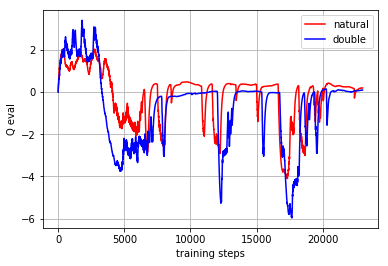

In [2]:
plt.plot(np.array(q_natural), c='r', label='natural')
plt.plot(np.array(q_double), c='b', label='double')
plt.legend(loc='best')
plt.ylabel('Q eval')
plt.xlabel('training steps')
plt.grid()
plt.show()